# Titanic Dataset Preprocessing

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [10]:
titanic= pd.read_csv('D:/Test/Titanic.csv')

In [11]:
titanic.head()

,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True


In [12]:
titanic.shape

(891, 9)

In [13]:
titanic.nunique()

sex              2
age             88
parch            7
fare           248
class            3
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

In [14]:
titanic.describe()

,age,parch,fare
count,714.000000,891.000000,891.000000
mean,29.699118,0.381594,32.204208
std,14.526497,0.806057,49.693429
min,0.420000,0.000000,0.000000
25%,20.125000,0.000000,7.910400
50%,28.000000,0.000000,14.454200
75%,38.000000,0.000000,31.000000
max,80.000000,6.000000,512.329200


In [15]:
titanic.describe(include=object)

,sex,class,deck,embark_town,alive
count,891,891,203,889,891
unique,2,3,7,3,2
top,male,Third,C,Southampton,no
freq,577,491,59,644,549


In [16]:
titanic['alive'].value_counts()

no     549
yes    342
Name: alive, dtype: int64

In [17]:
titanic.isnull().sum()

sex              0
age            177
parch            0
fare             0
class            0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

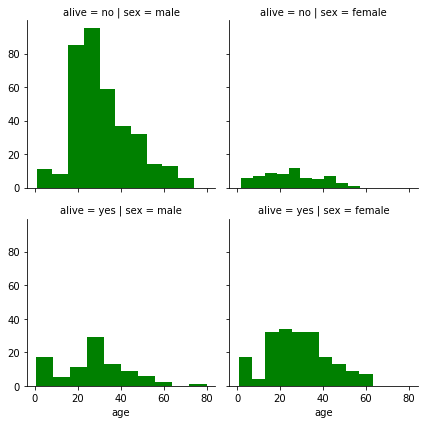

In [18]:
salive=sns.FacetGrid(titanic,col='sex',row='alive')
salive.map(plt.hist,'age', color='green')
plt.show()

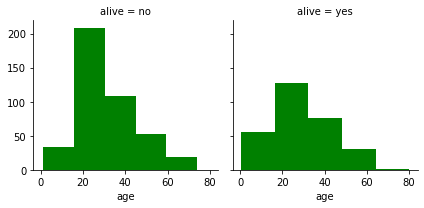

In [19]:
aalive=sns.FacetGrid(titanic,col='alive')
aalive.map(plt.hist,'age',bins=5,color='green')
plt.show()

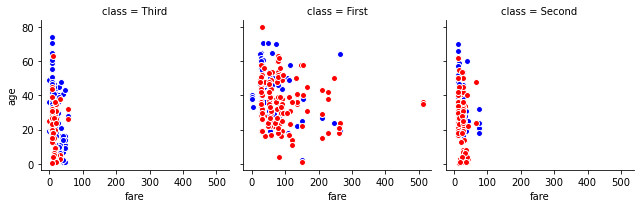

In [20]:
fare=sns.FacetGrid(titanic,col='class',hue='alive',margin_titles=True,palette={'yes':'red','no':'blue'})
fare.map(plt.scatter,'fare','age',edgecolor='w')
plt.show()


In [21]:
titanic.groupby('class')['alive'].value_counts()

class   alive
First   yes      136
        no        80
Second  no        97
        yes       87
Third   no       372
        yes      119
Name: alive, dtype: int64

# Preprocessing

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce



In [23]:
ordinal_mapping= [{'col':'class','mapping': {None:0, 'First':1, 'Second':2, 'Third':3}}]
ordinal_encoder=ce.OrdinalEncoder(cols='class', mapping=ordinal_mapping)


In [24]:
binary_encoder_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('binary encoder', ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('one hot encoder', OneHotEncoder(drop='first'), ['sex', 'alone']),
    ('ordinal encoding', ordinal_encoder, ['class']),
    ('simple imputer', SimpleImputer(strategy='median'), ['age']),
    ('binary encoder', binary_encoder_pipeline, ['embark_town'])
], remainder='passthrough')

In [25]:
#Data Split
titanic



,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,13.0000,Second,NaN,Southampton,no,True
887,female,19.0,0,30.0000,First,B,Southampton,yes,True
888,female,NaN,2,23.4500,Third,NaN,Southampton,no,False
889,male,26.0,0,30.0000,First,C,Cherbourg,yes,True


In [27]:
X=titanic.drop(columns=['deck','alive'])
y=np.where(titanic['alive'] == 'yes',1,0)           

In [28]:
X

,sex,age,parch,fare,class,embark_town,alone
0,male,22.0,0,7.2500,Third,Southampton,False
1,female,38.0,0,71.2833,First,Cherbourg,False
2,female,26.0,0,7.9250,Third,Southampton,True
3,female,35.0,0,53.1000,First,Southampton,False
4,male,35.0,0,8.0500,Third,Southampton,True
...,...,...,...,...,...,...,...
886,male,27.0,0,13.0000,Second,Southampton,True
887,female,19.0,0,30.0000,First,Southampton,True
888,female,NaN,2,23.4500,Third,Southampton,False
889,male,26.0,0,30.0000,First,Cherbourg,True


In [29]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [43]:
X_train

,sex,age,parch,fare,class,embark_town,alone
140,female,NaN,2,15.2458,Third,Cherbourg,False
439,male,31.0,0,10.5000,Second,Southampton,True
817,male,31.0,1,37.0042,Second,Cherbourg,False
378,male,20.0,0,4.0125,Third,Cherbourg,True
491,male,21.0,0,7.2500,Third,Southampton,True
...,...,...,...,...,...,...,...
835,female,39.0,1,83.1583,First,Cherbourg,False
192,female,19.0,0,7.8542,Third,Southampton,False
629,male,NaN,0,7.7333,Third,Queenstown,True
559,female,36.0,0,17.4000,Third,Southampton,False


In [44]:
#Data Transform
X_train_prep = transformer.fit_transform(X_train)
X_test_prep = transformer.transform(X_test)

In [45]:
X_train_prep = pd.DataFrame(X_train_prep)
X_test_prep = pd.DataFrame(X_test_prep)

In [46]:
transformer.transformers_

[('one hot encoder', OneHotEncoder(drop='first'), ['sex', 'alone']),
 ('ordinal encoding',
  OrdinalEncoder(cols=['class'],
                 mapping=[{'col': 'class',
                           'mapping': {None: 0, 'First': 1, 'Second': 2,
                                       'Third': 3}}]),
  ['class']),
 ('simple imputer', SimpleImputer(strategy='median'), ['age']),
 ('binary encoder',
  Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                  ('binary encoder',
                   BinaryEncoder(cols=[0],
                                 mapping=[{'col': 0,
                                           'mapping':     0_0  0_1
   1    0    1
   2    1    0
   3    1    1
  -1    0    0
  -2    0    0}]))]),
  ['embark_town']),
 ('remainder', 'passthrough', [2, 3])]

In [47]:
transformer.transformers_[0][1].get_feature_names()

array(['x0_male', 'x1_True'], dtype=object)

Build Linear Model()
Build Logistic Model ()

Accuracy

Classification Reort

In [48]:
transformer.transformers_[1][1].get_feature_names()

['class']

In [49]:
transformer.transformers_[3][1][1].get_feature_names()

['0_0', '0_1']

In [50]:
features = list(transformer. transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['age'] + transformer.transformers_[3][1][1].get_feature_names() + ['parch', 'fare']
X_train_prep.columns = features
X_test_prep.columns = features
X_train_prep

,x0_male,x1_True,class,age,0_0,0_1,parch,fare
0,0.0,0.0,3.0,29.0,0.0,1.0,2.0,15.2458
1,1.0,1.0,2.0,31.0,1.0,0.0,0.0,10.5000
2,1.0,0.0,2.0,31.0,0.0,1.0,1.0,37.0042
3,1.0,1.0,3.0,20.0,0.0,1.0,0.0,4.0125
4,1.0,1.0,3.0,21.0,1.0,0.0,0.0,7.2500
...,...,...,...,...,...,...,...,...
707,0.0,0.0,1.0,39.0,0.0,1.0,1.0,83.1583
708,0.0,0.0,3.0,19.0,1.0,0.0,0.0,7.8542
709,1.0,1.0,3.0,29.0,1.0,1.0,0.0,7.7333
710,0.0,0.0,3.0,36.0,1.0,0.0,0.0,17.4000


#Model Building for Logistic Regression

Apply Logistic Regression Model()

Accuracy

Classification Report
